In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/air-quality-data-in-india/air-quality-india.csv


In [2]:
df= pd.read_csv('/kaggle/input/air-quality-data-in-india/air-quality-india.csv')
df.head(10)

,Timestamp,Year,Month,Day,Hour,PM2.5
0,2017-11-07 12:00:00,2017,11,7,12,64.51
1,2017-11-07 13:00:00,2017,11,7,13,69.95
2,2017-11-07 14:00:00,2017,11,7,14,92.79
3,2017-11-07 15:00:00,2017,11,7,15,109.66
4,2017-11-07 16:00:00,2017,11,7,16,116.50
5,2017-11-07 17:00:00,2017,11,7,17,124.21
6,2017-11-07 18:00:00,2017,11,7,18,123.45
7,2017-11-07 19:00:00,2017,11,7,19,120.31
8,2017-11-07 20:00:00,2017,11,7,20,108.75
9,2017-11-07 21:00:00,2017,11,7,21,97.80


In [3]:
df.isnull().sum()

Timestamp    0
Year         0
Month        0
Day          0
Hour         0
PM2.5        0
dtype: int64

In [4]:
df.shape

(36192, 6)

In [5]:
df.describe().style.background_gradient(cmap = "Reds")


,Year,Month,Day,Hour,PM2.5
count,36192.000000,36192.000000,36192.000000,36192.000000,36192.000000
mean,2019.682278,6.331841,15.716401,11.477840,49.308429
std,1.345011,3.593321,8.859769,6.925088,24.863511
min,2017.000000,1.000000,1.000000,0.000000,7.020000
25%,2019.000000,3.000000,8.000000,5.000000,28.080000
50%,2020.000000,6.000000,16.000000,11.000000,45.730000
75%,2021.000000,10.000000,23.000000,17.000000,64.520000
max,2022.000000,12.000000,31.000000,23.000000,245.630000


> PM2.5 refers to size of the polluted material i.e 2.5micrometers. The lowest size of molecule Human eye ca n see is of 0.1 micrometer. You require microscope to see such small objects****

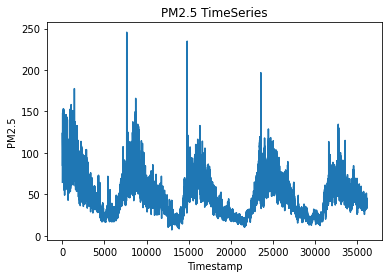

In [6]:
plt.plot(df['PM2.5'])

#labelling the graph

plt.xlabel('Timestamp')
plt.ylabel('PM2.5')
plt.title('PM2.5 TimeSeries')

#displaying graph
plt.show()

In [7]:
#Pm 2.5 Distribution Yearly

fig = px.box(df, x='Year', y='PM2.5', color= 'Year', points = 'all',title ='PM2.5 Distribution Yearly')
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.update_traces(marker= dict(size= 0.75)) #scaling the markers

fig.show()

In [8]:
#PM 2.5 Distribution Monthly
fig= px.histogram(df, x='Year', y='PM2.5', color='Month',hover_data= df.columns, title='Sum of PM2.5 Distribution Year and Month',
                 template = 'plotly_dark' )
fig.show()

In [9]:
# PM2.5 Distribution Monthly

fig = px.box(df, x='Month', y='PM2.5', color= 'Month', points = 'all',title ='PM2.5 Distribution Monthly')
fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

fig.update_traces(marker= dict(size= 0.75)) #scaling the markers

fig.show()

In [10]:
#PM 2.5 Distribution Month and year
fig= px.histogram(df, x='Month', y='PM2.5', color='Year',hover_data= df.columns, title='Sum of PM2.5 Distribution Month and Year',
                 template = 'plotly_dark' )
fig.show()

In [11]:
# Here I store years 2018-2021 in a df because 2017 and 2022 does not have data from every month
df1 = df[df["Year"] > 2017]
df2 = df1[df1["Year"] < 2022]

# Then loop through every month in years 2018-2021
for i in range(1, 13):
    df0 = df2[df2["Month"] == i]

    fig = px.histogram(df0, x = "Day", y = "PM2.5", color="Year", hover_data = df.columns,
                       color_discrete_sequence = px.colors.qualitative.Pastel, 
                       title = f"Daily Sum of PM2.5 in Month: {i}/--/2018-2021" )
    
    fig.update_layout(yaxis_range = [0, 11000])
    fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

    fig.show()

In [12]:
# Looping through all years in dataset - 2017 and 2022 does not have data for every month
for i in range(2017, 2023):
    df0 = df[df["Year"] == i]

    fig = px.histogram(df0, x = "Hour", y = "PM2.5", color="Month", hover_data = df.columns,
                       color_discrete_sequence = px.colors.qualitative.Set3, 
                       title = f"Total Sum of PM2.5 in Year: {i} by Hour" )
    
    fig.update_layout(yaxis_range = [0, 21000])
    fig.update_layout(template = "plotly_dark", font = dict(family = "PT Sans", size = 20))

    fig.show()